<a href="https://colab.research.google.com/github/abhiguptag22/brain_tumor_det/blob/main/brain_tumor_det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the necessary libraries
from google.colab import drive
drive.mount('/content/drive')
import os
import pandas as pd
# to view the un-shortened columns
pd.set_option('display.max_colwidth', -1)
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras.optimizers import RMSprop,Adam

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-2-b8c0b6e59e96>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


### Data Loading

In [ ]:
!ls '/content/drive/My Drive/Brain_Tumor_Detection/'

 archive.zip  'archive.zip (Unzipped Files)'   No   Pred   Yes


In [ ]:
# Directory where all the data are present
data_directory = '/content/drive/My Drive/Brain_Tumor_Detection'

In [ ]:
images = []
labels = []

for label in ["Yes", "No"]:
    label_folder = os.path.join(data_directory, label)
    for filename in os.listdir(label_folder):
        if filename.endswith(".jpg"):  #selecting only jpg files
            file_path = os.path.join(label_folder, filename)
            images.append(file_path)
            labels.append('yes' if label == "Yes" else 'no')  # 1 for "Yes," 0 for "No"

# Print the few image filenames and their corresponding labels
for i in range(1496,1503):
    print(f"Image: {images[i]}, Label: {labels[i]}")


Image: /content/drive/My Drive/Brain_Tumor_Detection/Yes/y1466.jpg, Label: yes
Image: /content/drive/My Drive/Brain_Tumor_Detection/Yes/y169.jpg, Label: yes
Image: /content/drive/My Drive/Brain_Tumor_Detection/Yes/y1251.jpg, Label: yes
Image: /content/drive/My Drive/Brain_Tumor_Detection/Yes/y183.jpg, Label: yes
Image: /content/drive/My Drive/Brain_Tumor_Detection/No/no1338.jpg, Label: no
Image: /content/drive/My Drive/Brain_Tumor_Detection/No/no1400.jpg, Label: no
Image: /content/drive/My Drive/Brain_Tumor_Detection/No/no108.jpg, Label: no


In [ ]:
import pandas as pd
JPG_Path_Series = pd.Series(images,name="Path").astype(str)
JPG_Category_Series = pd.Series(labels,name="Label")

In [ ]:
# Adding both Paths and Their Labels in a DataFrame
final_data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)
final_data.head()

,Path,Label
0,/content/drive/My Drive/Brain_Tumor_Detection/Yes/y1079.jpg,yes
1,/content/drive/My Drive/Brain_Tumor_Detection/Yes/y1061.jpg,yes
2,/content/drive/My Drive/Brain_Tumor_Detection/Yes/y1489.jpg,yes
3,/content/drive/My Drive/Brain_Tumor_Detection/Yes/y1414.jpg,yes
4,/content/drive/My Drive/Brain_Tumor_Detection/Yes/y1351.jpg,yes


In [ ]:
#shuffling the data
final_data = final_data.sample(frac=1.0, random_state=42)
final_data.head(10)

,Path,Label
1801,/content/drive/My Drive/Brain_Tumor_Detection/No/no429.jpg,no
1190,/content/drive/My Drive/Brain_Tumor_Detection/Yes/y1380.jpg,yes
1817,/content/drive/My Drive/Brain_Tumor_Detection/No/no527.jpg,no
251,/content/drive/My Drive/Brain_Tumor_Detection/Yes/y759.jpg,yes
2505,/content/drive/My Drive/Brain_Tumor_Detection/No/no1019.jpg,no
1117,/content/drive/My Drive/Brain_Tumor_Detection/Yes/y190.jpg,yes
1411,/content/drive/My Drive/Brain_Tumor_Detection/Yes/y1155.jpg,yes
2113,/content/drive/My Drive/Brain_Tumor_Detection/No/no330.jpg,no
408,/content/drive/My Drive/Brain_Tumor_Detection/Yes/y73.jpg,yes
2579,/content/drive/My Drive/Brain_Tumor_Detection/No/no1239.jpg,no


### Visualisation of the data

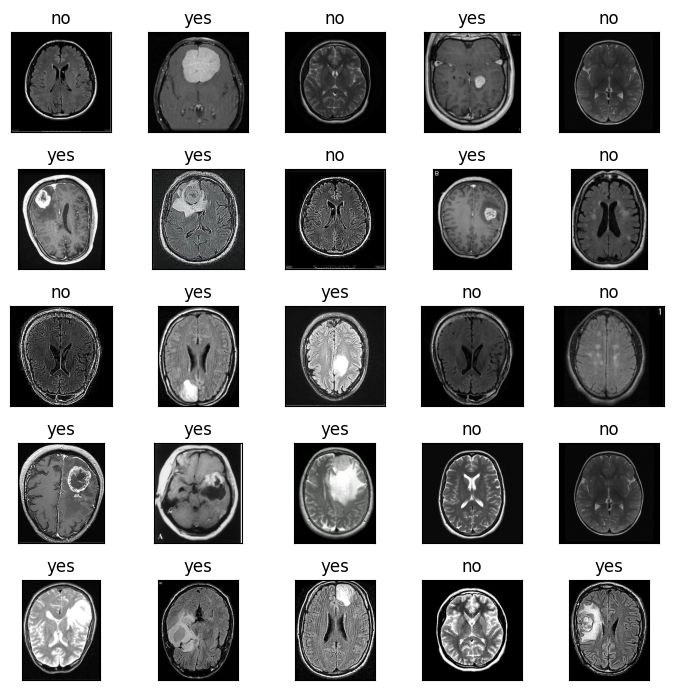

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(7,7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(final_data.iloc[i]['Path']))
    ax.set_title(final_data.iloc[i]['Label'])
plt.tight_layout()
plt.show()

In [ ]:
#splitting data for training and test sets
train_data,test_data = train_test_split(final_data,train_size=0.85,random_state=42)

In [ ]:
train_data.shape

(2550, 2)

In [ ]:
test_data.shape

(450, 2)

### Data Augmentation

In [ ]:
data_generator = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0, 1]
    validation_split = 0.1     # taking 10% of data for validation
    )

In [ ]:
# Creating training set
Train_Set = data_generator.flow_from_dataframe(dataframe=train_data,
                                               x_col="Path",
                                               y_col="Label",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200),
                                               shuffle= False)

Found 2295 validated image filenames belonging to 2 classes.


In [ ]:
# Creating validation set
Validation_Set = data_generator.flow_from_dataframe(dataframe=train_data,
                                                     x_col="Path",
                                                     y_col="Label",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200),
                                                     shuffle=False)

Found 255 validated image filenames belonging to 2 classes.


In [ ]:
# Creating test set
Test_Set = data_generator.flow_from_dataframe(dataframe=test_data,
                                                     x_col="Path",
                                                     y_col="Label",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     batch_size=20,
                                                     target_size=(200,200),
                                                     shuffle=False)

Found 450 validated image filenames belonging to 2 classes.


In [ ]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])

{'no': 0, 'yes': 1}
[0, 1, 1, 1, 0]


In [ ]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:10])

{'no': 0, 'yes': 1}
[0, 0, 0, 1, 1, 0, 1, 0, 1, 0]


### Modelling

In [ ]:
# creating the model
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#

Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(256,activation="relu"))
Model.add(Dense(2,activation="softmax"))

In [ ]:
#compiling the model using Adam as optimizer with learning rate 0.001
Model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# training the model using train_set and validation_set
cnn_model = Model.fit(Train_Set,validation_data=Validation_Set, epochs=15)

Epoch 1/15
115/115 [==============================] - 11s 85ms/step - loss: 0.6018 - accuracy: 0.6841 - val_loss: 0.4786 - val_accuracy: 0.7725
Epoch 2/15
115/115 [==============================] - 9s 75ms/step - loss: 0.4030 - accuracy: 0.8209 - val_loss: 0.3350 - val_accuracy: 0.8706
Epoch 3/15
115/115 [==============================] - 10s 84ms/step - loss: 0.2687 - accuracy: 0.8980 - val_loss: 0.2133 - val_accuracy: 0.9216
Epoch 4/15
115/115 [==============================] - 9s 82ms/step - loss: 0.2029 - accuracy: 0.9216 - val_loss: 0.1429 - val_accuracy: 0.9451
Epoch 5/15
115/115 [==============================] - 8s 73ms/step - loss: 0.1289 - accuracy: 0.9542 - val_loss: 0.1140 - val_accuracy: 0.9569
Epoch 6/15
115/115 [==============================] - 9s 82ms/step - loss: 0.1072 - accuracy: 0.9634 - val_loss: 0.1758 - val_accuracy: 0.9255
Epoch 7/15
115/115 [==============================] - 10s 83ms/step - loss: 0.0656 - accuracy: 0.9782 - val_loss: 0.0632 - val_accuracy: 0.9

### Model Summary and Performance

In [ ]:
Model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 98, 98, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 98, 98, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 48, 48, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 48, 48, 64)       

In [ ]:
# Measuring the test_set prediction performance
model_result = Model.evaluate(Test_Set,verbose=False)
print("Total Loss :  {:.4f}".format(model_result[0]))
print("Accuracy :  {:.4f}".format(model_result[1]))

Total Loss :  0.0586
Accuracy :  0.9911


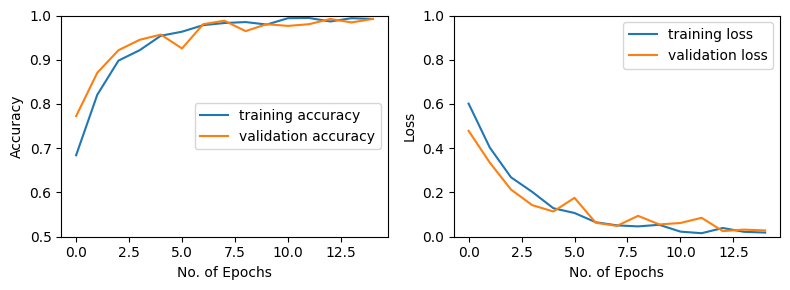

In [ ]:
# Plotting accuracy and loss curves
plt.figure(figsize=(8, 3))

# First subplot (accuracy)
plt.subplot(1, 2, 1)
plt.plot(cnn_model.history["accuracy"])
plt.plot(cnn_model.history["val_accuracy"])
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1)
plt.legend(('training accuracy', 'validation accuracy'), loc='center right')

# Second subplot (loss)
plt.subplot(1, 2, 2)
plt.plot(cnn_model.history["loss"])
plt.plot(cnn_model.history["val_loss"])
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.ylim(0, 1)
plt.legend(('training loss', 'validation loss'), loc='upper right')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [ ]:
predictions = Model.predict(Test_Set)

23/23 [==============================] - 2s 74ms/step


In [ ]:
class_labels = [0, 1]

# Getting the predicted class label for each sample
predicted_labels = [class_labels[p.argmax()] for p in predictions]

predicted_labels[:10]

[0, 0, 0, 1, 1, 0, 1, 0, 1, 0]

In [ ]:
Test_Set.classes[:10]

[0, 0, 0, 1, 1, 0, 1, 0, 1, 0]

In [ ]:
print(classification_report(predicted_labels, Test_Set.classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       203
           1       1.00      0.99      0.99       247

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



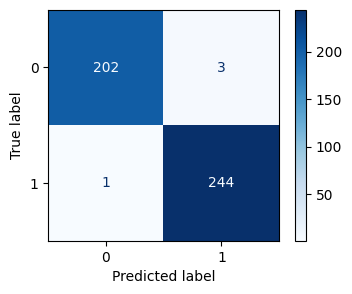

In [ ]:
cm = confusion_matrix(Test_Set.classes, predicted_labels)
# Creating a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(4,3))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)

###Prediction on Pred Dataset

In [ ]:
# Directory containing the images in pred_set
pred_dir = data_directory + "/Pred"
pred_images = []  # To store the images

for filename in os.listdir(pred_dir):
    if filename.endswith(".jpg"):  #selecting only jpg files
        file_path = os.path.join(pred_dir, filename)
        pred_images.append(file_path)

# Creating a pandas dataframe on pred_images data
pred_data = pd.DataFrame(pred_images).rename(columns={0:'Path'})

# Preprocessing the pred_data
Pred_Set = data_generator.flow_from_dataframe(dataframe=pred_data,
                                               x_col="Path",
                                               y_col=None,
                                               color_mode="grayscale",
                                               class_mode=None,
                                               batch_size=20,
                                               target_size=(200,200),
                                               shuffle= False)

In [ ]:
pred_predictions = Model.predict(Pred_Set)

3/3 [==============================] - 0s 68ms/step


In [ ]:
pred_labels = [class_labels[p.argmax()] for p in pred_predictions]
pred_labels[:5]

[0, 1, 1, 0, 0]

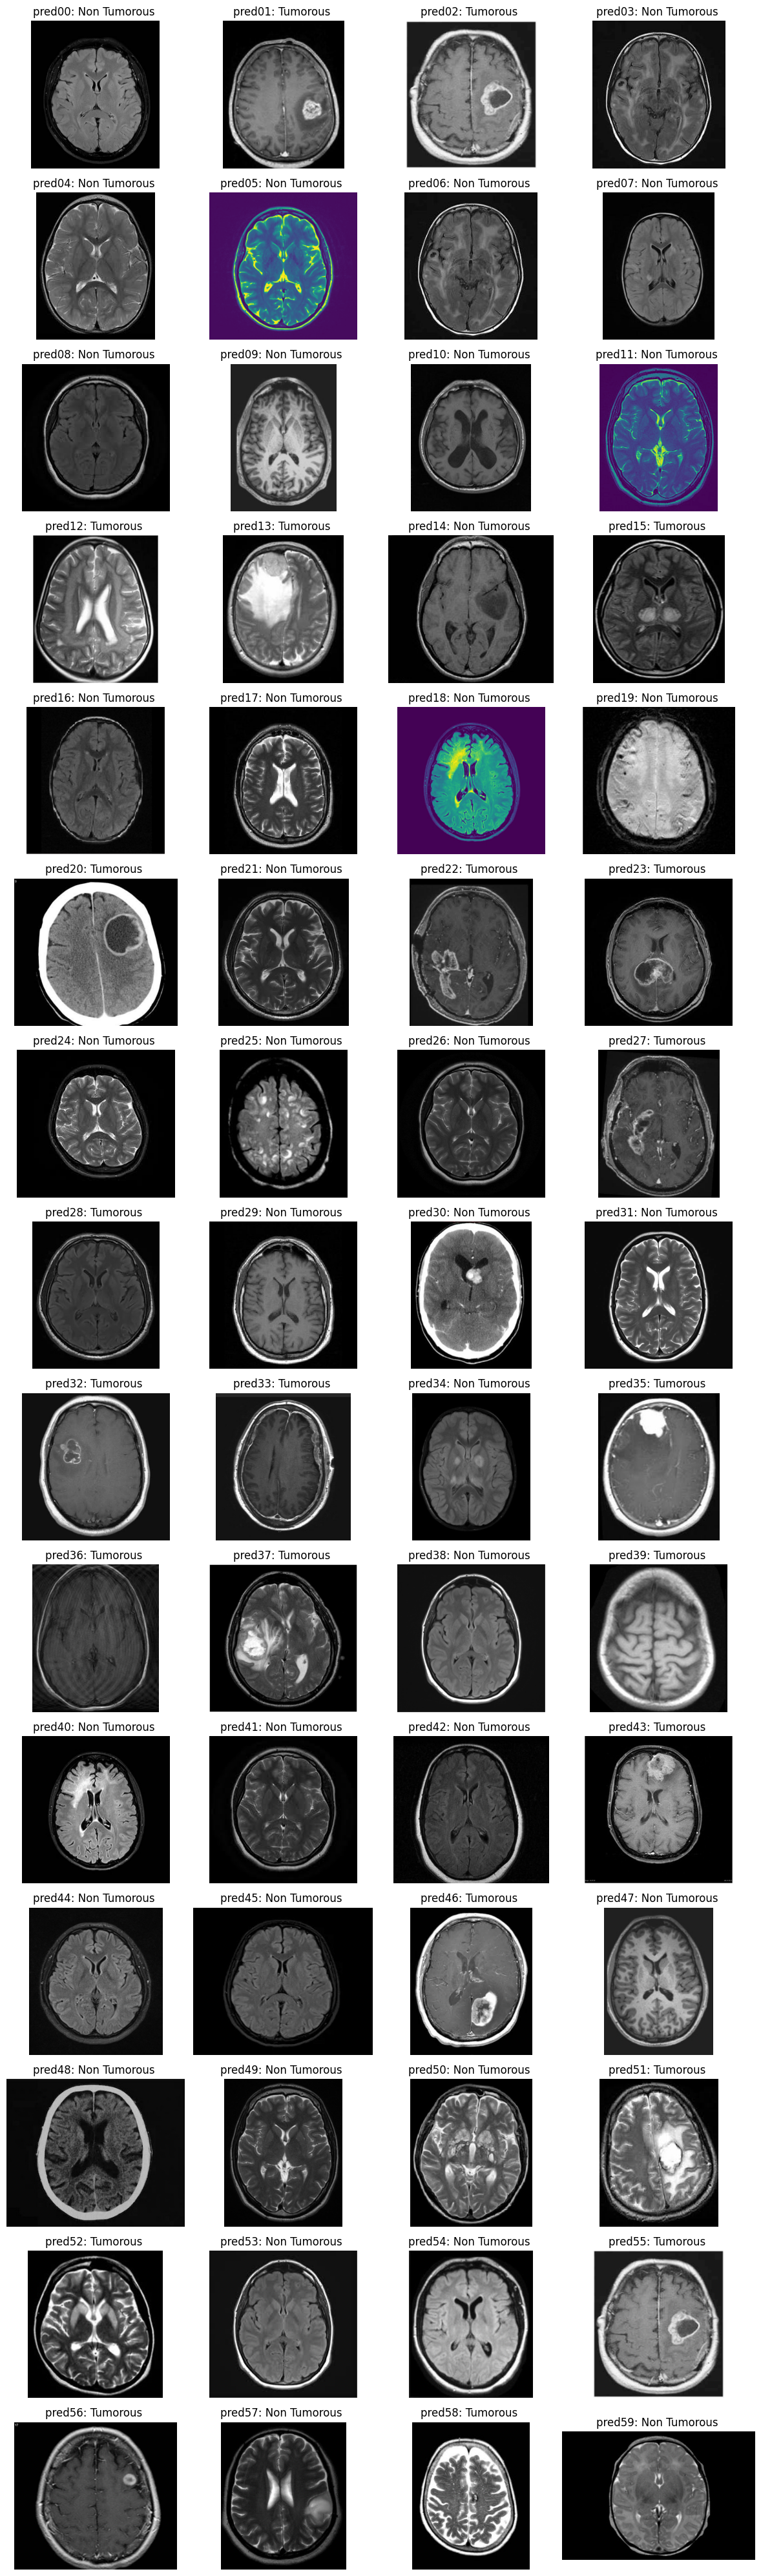

In [ ]:
# Creating a subplot grid with 15 rows and 5 columns (for 60 images)
#We can always adjust the settings here for any number of images
fig, axes = plt.subplots(15, 4, figsize=(12,40))

for i, img_path in enumerate(pred_data["Path"]):
    row = i // 4  # Calculate the row for the current image
    col = i % 4   # Calculate the column for the current image

    img = Image.open(img_path)
    ax = axes[row, col]
    ax.imshow(img)
    # Setting a title for the subplot
    ax.set_title(f"pred{i:02d}: {'Tumorous' if pred_labels[i]==1 else 'Non Tumorous'} ")

    ax.axis('off')  # Turn off axis labels

# Remove any empty subplots
for i in range(len(pred_data), 15*4):
    row = i // 4
    col = i % 4
    fig.delaxes(axes[row, col])

plt.tight_layout()  # Adjust the layout for a cleaner appearance
plt.show()
